Below is summary of data schema - 
![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
train_data = pd.read_csv('../input/application_train.csv')

In [31]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
test_data = pd.read_csv('../input/application_test.csv')

In [33]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


There is lot of missing values in dataframe which will have to be filled to properly train model on it.

In [34]:
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Hence no. of loan that were repaid were far greater than loans that were not repayed hence dataset is not exactly balanced.

Next we have to deal with catagorical data so we have to perform encoding i.e. convert text type labels into numerical labels using scikit-learn's default label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
j = 0
for column in train_data:
    if train_data[column].dtype == 'object':
        if len(list(train_data[column].unique())) <= 2:
            le.fit(train_data[column])
            train_data[column] = le.transform(train_data[column])
            test_data[column] = le.transform(test_data[column])
            j += 1
print(str(j) + ' Columns encoded')

3 Columns encoded


so LabelEncoder was useless so trying one hot encoding

In [37]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


That was usefull !. Now trying to find correlations in the data

In [38]:
correlations = train_data.corr()['TARGET']

In [39]:
correlations.sort_values(ascending=False)

TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
DAYS_REGISTRATION                                    0.041975
OWN_CAR_AGE                                          0.037612
LIVE_CIT

In [40]:
train_data['DAYS_BIRTH'].corr(train_data['TARGET'])

0.07823930830982694

It is apparant that DAYS_BIRTH which is days since birth is highly correlated implying that as person gets older he is less likely to default on loan. But this correlation is negative so as person gets older he is less likely to default on loan

EXT_SOURCE# Seem to be highly negatively correlated but very non-descript

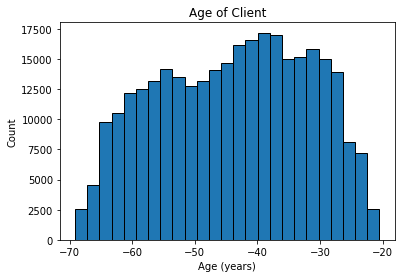

In [41]:
plt.hist(train_data['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

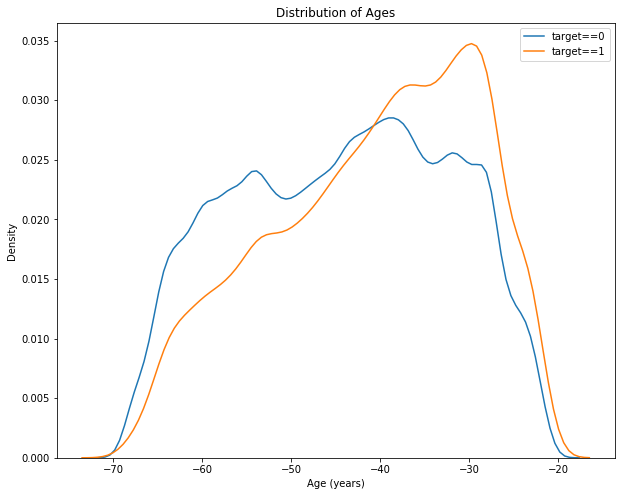

In [42]:
plt.figure(figsize=(10,8))

sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH']/365, label='target==0')
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH']/365, label='target==1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

As is evident from above Curve for default (target == 0) is skewed towards younger side of ages

Exploring the EXT SOURCES using seaborn correlation heatmaps

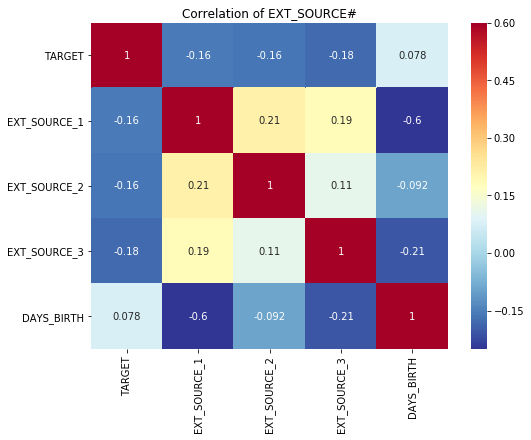

In [43]:
ext_data_corrs = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation of EXT_SOURCE#');

1. ALL the EXT_SOURCES Are negatively correlated to loan default

# Imputing missing values by default mean method

In [51]:
from sklearn.impute import SimpleImputer
train_data = train_data[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
X = train_data.drop('TARGET',axis=1)
list_of_features = X.columns
Y = train_data['TARGET']

imputer = SimpleImputer()

X = pd.DataFrame(imputer.fit_transform(X))
X.columns = list_of_features
X.shape

(307511, 4)

# Machine Learning Models Code

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [53]:
def print_metrics(y_test,predictions,model):
    print('\033[1m' + model + '\033[0m' + '\n\n')
    print('\033[1m' + 'Confusion Matrix - ' + '\033[0m')
    print(confusion_matrix(y_test,predictions))
    print('\033[1m' + 'Classification Report - ' + '\033[0m')
    print(classification_report(y_test,predictions))
    print('\033[1m' + 'Final Accuracy Score - ' + '\033[0m')
    print(accuracy_score(y_test,predictions))

def tree_models(X,y,n):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    dt = dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    predictions_dt = dt.predict(X_test)
    print_metrics(y_test,predictions_dt,'Decision Tree')
    rfc = RandomForestClassifier(n_estimators=n,n_jobs=-1)
    rfc.fit(X_train,y_train)
    predictions_rfc = rfc.predict(X_test)
    print_metrics(y_test,predictions_rfc,'Random Forrest')
    

In [54]:
tree_models(X,Y,200)

Decision Tree


Confusion Matrix - 
[[77618  7169]
 [ 6341  1126]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     84787
           1       0.14      0.15      0.14      7467

   micro avg       0.85      0.85      0.85     92254
   macro avg       0.53      0.53      0.53     92254
weighted avg       0.86      0.85      0.86     92254

Final Accuracy Score - 
0.8535564853556485
Random Forrest


Confusion Matrix - 
[[84303   484]
 [ 7228   239]]
Classification Report - 
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84787
           1       0.33      0.03      0.06      7467

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.63      0.51      0.51     92254
weighted avg       0.87      0.92      0.88     92254

Final Accuracy Score - 
0.9164047087389164
